In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sleep_df = pd.read_csv("060124-oura-dailysleep.csv")
activity_df = pd.read_csv("060124-oura-dailyactivity.csv")
readiness_df = pd.read_csv("060124-oura-dailyreadiness.csv")

In [3]:
sleep_df.head()

,score,day,contributors_timing,contributors_deep_sleep,contributors_restfulness,contributors_efficiency,contributors_latency,contributors_rem_sleep,contributors_total_sleep
0,73,2024-01-02,67,72,85,98,97,69,57
1,78,2024-01-03,61,67,60,90,89,92,84
2,82,2024-01-04,42,74,82,99,70,96,90
3,86,2024-01-05,29,96,79,99,72,97,99
4,64,2024-01-06,22,81,56,93,67,81,61


In [6]:
activity_df.head()

,active_calories,average_met_minutes,day,equivalent_walking_distance,high_activity_met_minutes,high_activity_time,inactivity_alerts,low_activity_met_minutes,low_activity_time,medium_activity_met_minutes,...,score,class_5_min,contributors_meet_daily_targets,contributors_move_every_hour,contributors_recovery_time,contributors_stay_active,contributors_training_frequency,contributors_training_volume,met_1_min,ring_met_1_min
0,67,1.12500,2024-01-01,1232,0,0,0,45,3360,6,...,94.0,0000000000000000000000000000000000000000000000...,78.0,100.0,100.0,100.0,100.0,99.0,0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0....,0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0.1;0....
1,501,1.50000,2024-01-02,8720,0,0,2,233,19080,138,...,92.0,1111111111111111111111111111111111211233433333...,95.0,78.0,100.0,71.0,100.0,98.0,3.2;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0....,3.2;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0....
2,714,1.62500,2024-01-03,11463,249,1380,1,236,18240,50,...,93.0,1111112211111111111222211111121111111122111112...,95.0,95.0,100.0,68.0,100.0,98.0,0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0....,0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0....
3,356,1.40625,2024-01-04,5984,0,0,0,207,16260,50,...,89.0,1111111111111111111111111111111212111111111121...,78.0,100.0,100.0,67.0,96.0,97.0,0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0....,0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0.9;0....
4,786,1.65625,2024-01-05,14662,0,0,0,354,23460,240,...,97.0,1111111111111111111112112211111111111111111111...,95.0,100.0,100.0,90.0,100.0,97.0,1.2;0.9;0.9;0.9;0.9;1.2;1.1;0.9;0.9;0.9;1.1;0....,1.2;0.9;0.9;0.9;0.9;1.2;1.1;0.9;0.9;0.9;1.1;0....


In [8]:
readiness_df.head()

,score,day,temperature_deviation,temperature_trend_deviation,contributors_activity_balance,contributors_hrv_balance,contributors_previous_day_activity,contributors_previous_night,contributors_recovery_index,contributors_resting_heart_rate,contributors_sleep_balance,contributors_body_temperature
0,80,2024-01-02,-0.53,NaN,84.0,NaN,NaN,76.0,50,100,NaN,94
1,92,2024-01-03,-0.19,-0.12,85.0,NaN,96.0,82.0,100,99,NaN,100
2,87,2024-01-04,-0.16,-0.17,81.0,NaN,69.0,88.0,94,96,NaN,100
3,88,2024-01-05,0.06,-0.18,89.0,NaN,99.0,94.0,71,90,83.0,100
4,78,2024-01-06,0.03,-0.05,78.0,NaN,91.0,54.0,85,94,68.0,100


In [10]:
final_df = activity_df.merge(sleep_df, on='day', how='left').merge(readiness_df, on='day', how='left')
final_df.head()

,active_calories,average_met_minutes,day,equivalent_walking_distance,high_activity_met_minutes,high_activity_time,inactivity_alerts,low_activity_met_minutes,low_activity_time,medium_activity_met_minutes,...,temperature_deviation,temperature_trend_deviation,contributors_activity_balance,contributors_hrv_balance,contributors_previous_day_activity,contributors_previous_night,contributors_recovery_index,contributors_resting_heart_rate,contributors_sleep_balance,contributors_body_temperature
0,67,1.12500,2024-01-01,1232,0,0,0,45,3360,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,501,1.50000,2024-01-02,8720,0,0,2,233,19080,138,...,-0.53,NaN,84.0,NaN,NaN,76.0,50.0,100.0,NaN,94.0
2,714,1.62500,2024-01-03,11463,249,1380,1,236,18240,50,...,-0.19,-0.12,85.0,NaN,96.0,82.0,100.0,99.0,NaN,100.0
3,356,1.40625,2024-01-04,5984,0,0,0,207,16260,50,...,-0.16,-0.17,81.0,NaN,69.0,88.0,94.0,96.0,NaN,100.0
4,786,1.65625,2024-01-05,14662,0,0,0,354,23460,240,...,0.06,-0.18,89.0,NaN,99.0,94.0,71.0,90.0,83.0,100.0


In [12]:
# Rename columns
final_df.rename(columns={
    'score': 'readiness_score',
    'score_x': 'activity_score',
    'score_y': 'sleep_score'
}, inplace=True)

In [14]:
# Convert date column to datetime and extract day names
final_df['date'] = pd.to_datetime(final_df['day'])
final_df['weekday'] = final_df['date'].dt.day_name()

In [16]:
final_df.columns

Index(['active_calories', 'average_met_minutes', 'day',
       'equivalent_walking_distance', 'high_activity_met_minutes',
       'high_activity_time', 'inactivity_alerts', 'low_activity_met_minutes',
       'low_activity_time', 'medium_activity_met_minutes',
       'medium_activity_time', 'meters_to_target', 'non_wear_time',
       'resting_time', 'sedentary_met_minutes', 'sedentary_time', 'steps',
       'target_calories', 'target_meters', 'total_calories', 'activity_score',
       'class_5_min', 'contributors_meet_daily_targets',
       'contributors_move_every_hour', 'contributors_recovery_time',
       'contributors_stay_active', 'contributors_training_frequency',
       'contributors_training_volume', 'met_1_min', 'ring_met_1_min',
       'sleep_score', 'contributors_timing', 'contributors_deep_sleep',
       'contributors_restfulness', 'contributors_efficiency',
       'contributors_latency', 'contributors_rem_sleep',
       'contributors_total_sleep', 'readiness_score', 'temper

In [18]:
# Not dropping rows with null values
# df_clean = final_df.dropna()

# Display cleaned DataFrame
# print("\nCleaned DataFrame (Rows with Nulls Dropped):")
# print(df_clean)


# Remove rows where 'non_wear_time' is greater than 14400
df_clean = final_df[final_df['non_wear_time'] <= 14400]

# Filtering out rows where the month is June
df_clean = df_clean[df_clean['date'].dt.month != 6]

# Verify by checking the shape or first few rows of the DataFrame
print(f"Updated DataFrame shape: {df_clean.shape}")
df_clean.info

Updated DataFrame shape: (141, 51)


<bound method DataFrame.info of      active_calories  average_met_minutes         day  \
1                501              1.50000  2024-01-02   
2                714              1.62500  2024-01-03   
3                356              1.40625  2024-01-04   
4                786              1.65625  2024-01-05   
5                339              1.43750  2024-01-06   
..               ...                  ...         ...   
147              521              1.53125  2024-05-27   
148              907              1.68750  2024-05-28   
149             1240              1.90625  2024-05-29   
150             1856              2.28125  2024-05-30   
151              749              1.62500  2024-05-31   

     equivalent_walking_distance  high_activity_met_minutes  \
1                           8720                          0   
2                          11463                        249   
3                           5984                          0   
4                          1466

In [20]:
# Display all variables (columns)
print("Columns:", df_clean.columns.tolist())

# Display the number of non-null entries per column
non_null_counts = df_clean.count()
print("\nNumber of Non-Null Entries per Column:")
print(non_null_counts)

Columns: ['active_calories', 'average_met_minutes', 'day', 'equivalent_walking_distance', 'high_activity_met_minutes', 'high_activity_time', 'inactivity_alerts', 'low_activity_met_minutes', 'low_activity_time', 'medium_activity_met_minutes', 'medium_activity_time', 'meters_to_target', 'non_wear_time', 'resting_time', 'sedentary_met_minutes', 'sedentary_time', 'steps', 'target_calories', 'target_meters', 'total_calories', 'activity_score', 'class_5_min', 'contributors_meet_daily_targets', 'contributors_move_every_hour', 'contributors_recovery_time', 'contributors_stay_active', 'contributors_training_frequency', 'contributors_training_volume', 'met_1_min', 'ring_met_1_min', 'sleep_score', 'contributors_timing', 'contributors_deep_sleep', 'contributors_restfulness', 'contributors_efficiency', 'contributors_latency', 'contributors_rem_sleep', 'contributors_total_sleep', 'readiness_score', 'temperature_deviation', 'temperature_trend_deviation', 'contributors_activity_balance', 'contributors

In [22]:
df_clean.describe()

,active_calories,average_met_minutes,equivalent_walking_distance,high_activity_met_minutes,high_activity_time,inactivity_alerts,low_activity_met_minutes,low_activity_time,medium_activity_met_minutes,medium_activity_time,...,temperature_trend_deviation,contributors_activity_balance,contributors_hrv_balance,contributors_previous_day_activity,contributors_previous_night,contributors_recovery_index,contributors_resting_heart_rate,contributors_sleep_balance,contributors_body_temperature,date
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,140.000000,130.000000,135.000000,129.000000,140.000000,141.000000,141.000000,138.000000,141.000000,141
mean,654.801418,1.578236,11307.354610,27.673759,208.510638,0.829787,208.695035,15842.978723,254.028369,4263.404255,...,0.111143,80.715385,76.037037,80.410853,82.564286,78.482270,82.120567,78.434783,90.702128,2024-03-18 04:15:19.148936192
min,91.000000,1.187500,1380.000000,0.000000,0.000000,0.000000,52.000000,4920.000000,6.000000,120.000000,...,-0.250000,58.000000,15.000000,1.000000,10.000000,1.000000,1.000000,46.000000,1.000000,2024-01-02 00:00:00
25%,409.000000,1.437500,6659.000000,0.000000,0.000000,0.000000,159.000000,12360.000000,99.000000,1860.000000,...,-0.022500,74.250000,72.000000,77.000000,75.000000,62.000000,77.000000,74.000000,90.000000,2024-02-09 00:00:00
50%,624.000000,1.562500,10787.000000,0.000000,0.000000,1.000000,203.000000,15060.000000,213.000000,3660.000000,...,0.050000,83.000000,83.000000,83.000000,86.500000,86.000000,93.000000,80.000000,99.000000,2024-03-20 00:00:00
75%,807.000000,1.687500,13937.000000,8.000000,60.000000,1.000000,240.000000,18660.000000,357.000000,6060.000000,...,0.180000,87.000000,87.000000,88.000000,97.000000,100.000000,100.000000,85.000000,100.000000,2024-04-24 00:00:00
max,1856.000000,2.281250,33594.000000,558.000000,4680.000000,4.000000,501.000000,35760.000000,1105.000000,19620.000000,...,1.220000,99.000000,92.000000,100.000000,100.000000,100.000000,100.000000,96.000000,100.000000,2024-05-31 00:00:00
std,322.256314,0.194391,5650.509818,78.048108,601.095353,0.933178,73.212698,5094.205075,198.963239,3150.589929,...,0.256924,9.790230,16.591406,13.688848,17.050163,23.893395,26.192277,9.035984,20.067296,NaN


In [24]:
df_clean['total_calories'].mean()

2930.8368794326243

In [26]:
df_clean['steps'].mean()

12020.503546099291

/Users/alexmerdjanian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


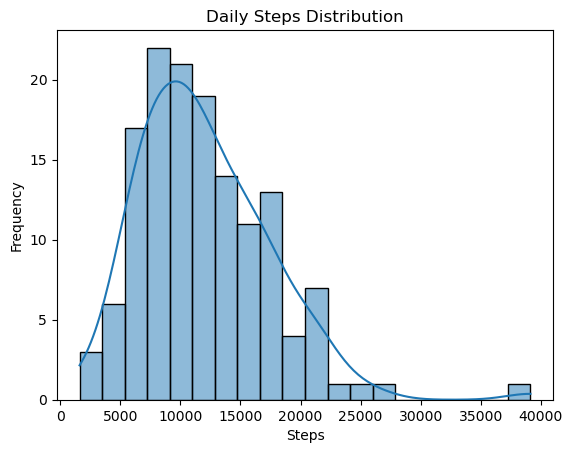

In [28]:
# Daily Steps Distribution
sns.histplot(df_clean['steps'], bins=20, kde=True)
plt.title('Daily Steps Distribution')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

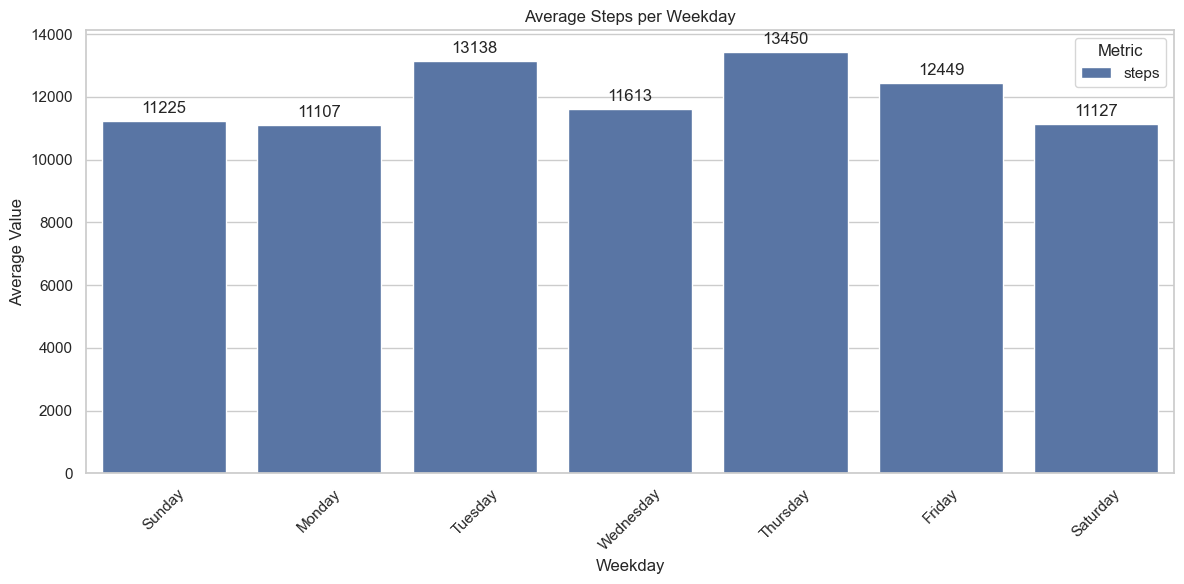

In [30]:
# Remove non-numeric columns (except the grouping one)
numeric_columns = ['steps']

# Group by weekday and calculate the mean
avg_dailyactivity = df_clean.groupby('weekday')[numeric_columns].mean().reindex([
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'
])

# Melt the DataFrame for easier plotting
avg_dailyactivity_melted = avg_dailyactivity.reset_index().melt(id_vars='weekday', value_vars=numeric_columns,
                                                                var_name='Metric', value_name='Average')

# Plot the bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='weekday', y='Average', hue='Metric', data=avg_dailyactivity_melted)

# Annotate each bar with its value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.title('Average Steps per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

/Users/alexmerdjanian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexmerdjanian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexmerdjanian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexmerdjanian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

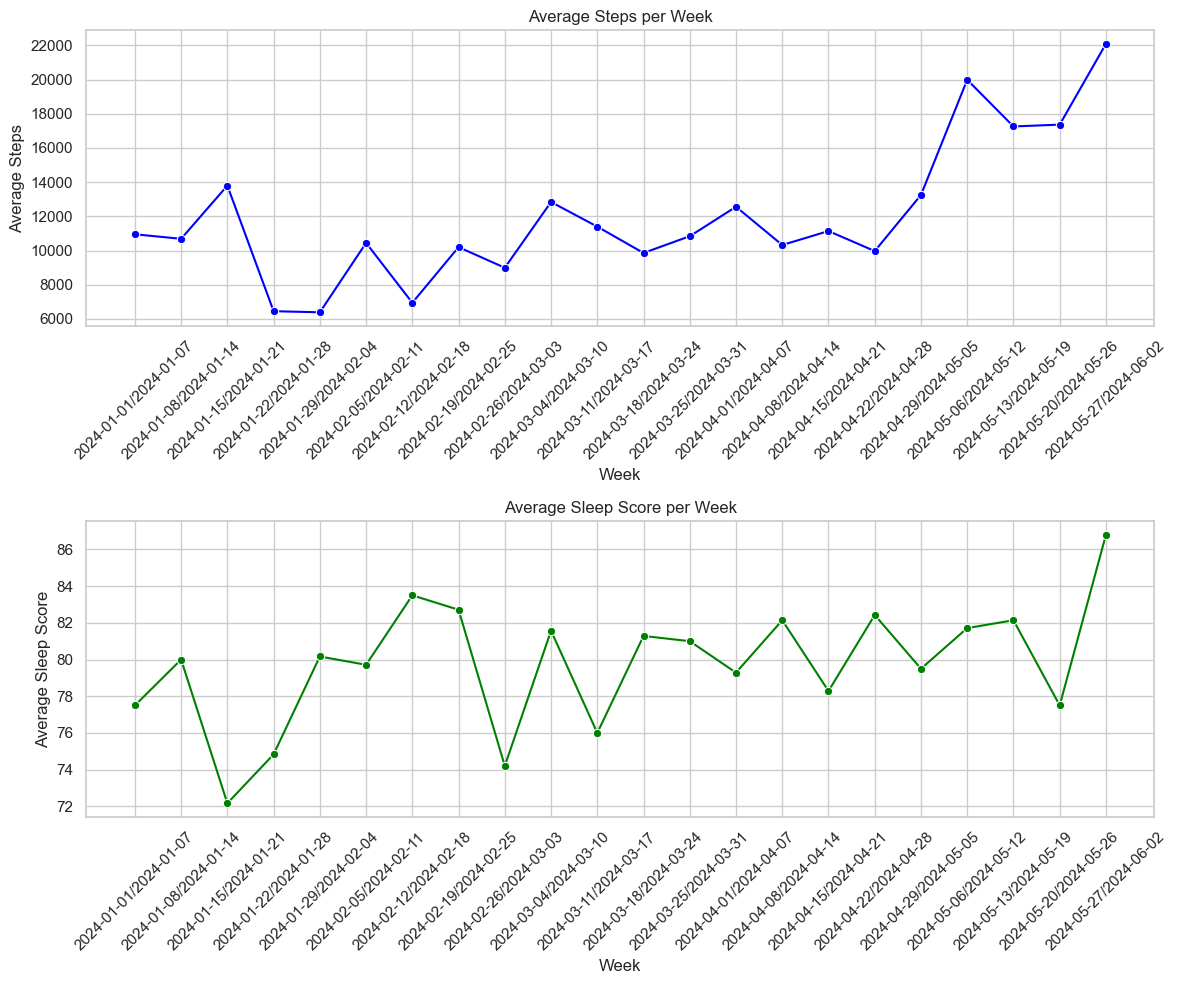

In [32]:
df_clean['week'] = df_clean['date'].dt.to_period('W').astype(str)

# Calculate average steps and sleep scores per week
avg_weekly = df_clean.groupby('week')[['steps', 'sleep_score']].mean().reset_index()

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Average Steps per Week
sns.lineplot(x='week', y='steps', data=avg_weekly, ax=axes[0], marker='o', color='blue')
axes[0].set_title('Average Steps per Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Average Steps')
axes[0].tick_params(axis='x', rotation=45)

# Average Sleep Score per Week
sns.lineplot(x='week', y='sleep_score', data=avg_weekly, ax=axes[1], marker='o', color='green')
axes[1].set_title('Average Sleep Score per Week')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Average Sleep Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [34]:
# Add 'week_type' column
df_clean['week_type'] = df_clean['date'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Separate data into weekdays and weekends
weekdays = df_clean[df_clean['week_type'] == 'Weekday']['steps']
weekends = df_clean[df_clean['week_type'] == 'Weekend']['steps']

# Calculate mean and standard deviation
mean_weekdays = weekdays.mean()
std_weekdays = weekdays.std()

mean_weekends = weekends.mean()
std_weekends = weekends.std()

print(f"Weekdays - Mean Steps: {mean_weekdays:.2f}, Standard Deviation: {std_weekdays:.2f}")
print(f"Weekends - Mean Steps: {mean_weekends:.2f}, Standard Deviation: {std_weekends:.2f}")

Weekdays - Mean Steps: 12341.95, Standard Deviation: 5713.46
Weekends - Mean Steps: 11179.79, Standard Deviation: 4740.06


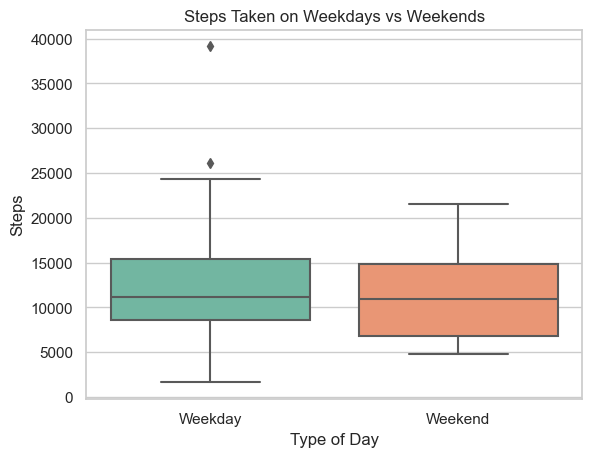

T-Test Results: t-statistic = 1.228, p-value = 0.223
Mann-Whitney U Test Results: U-statistic = 2229.500, p-value = 0.269
There is no significant difference in steps taken between weekdays and weekends (T-Test).
There is no significant difference in steps taken between weekdays and weekends (Mann-Whitney U Test).


In [36]:
from scipy.stats import ttest_ind, mannwhitneyu

#Labeling days
df_clean['weekday'] = df_clean['date'].dt.day_name()
df_clean['week_type'] = df_clean['weekday'].apply(lambda x: 'Weekday' if x not in ['Saturday', 'Sunday'] else 'Weekend')

# Plot the average steps for Weekday vs. Weekend
sns.boxplot(x='week_type', y='steps', data=df_clean, palette='Set2')
plt.title('Steps Taken on Weekdays vs Weekends')
plt.xlabel('Type of Day')
plt.ylabel('Steps')
plt.show()

# Separate data into weekdays and weekends
weekdays = df_clean[df_clean['week_type'] == 'Weekday']['steps']
weekends = df_clean[df_clean['week_type'] == 'Weekend']['steps']

# Perform a T-Test or Mann-Whitney U Test
t_stat, p_value = ttest_ind(weekdays, weekends, equal_var=False)
u_stat, mw_p_value = mannwhitneyu(weekdays, weekends)

print(f"T-Test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
print(f"Mann-Whitney U Test Results: U-statistic = {u_stat:.3f}, p-value = {mw_p_value:.3f}")

# Interpret Results
alpha = 0.1
if p_value < alpha:
    print("There is a significant difference in steps taken between weekdays and weekends (T-Test).")
else:
    print("There is no significant difference in steps taken between weekdays and weekends (T-Test).")

if mw_p_value < alpha:
    print("There is a significant difference in steps taken between weekdays and weekends (Mann-Whitney U Test).")
else:
    print("There is no significant difference in steps taken between weekdays and weekends (Mann-Whitney U Test).")

/Users/alexmerdjanian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexmerdjanian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


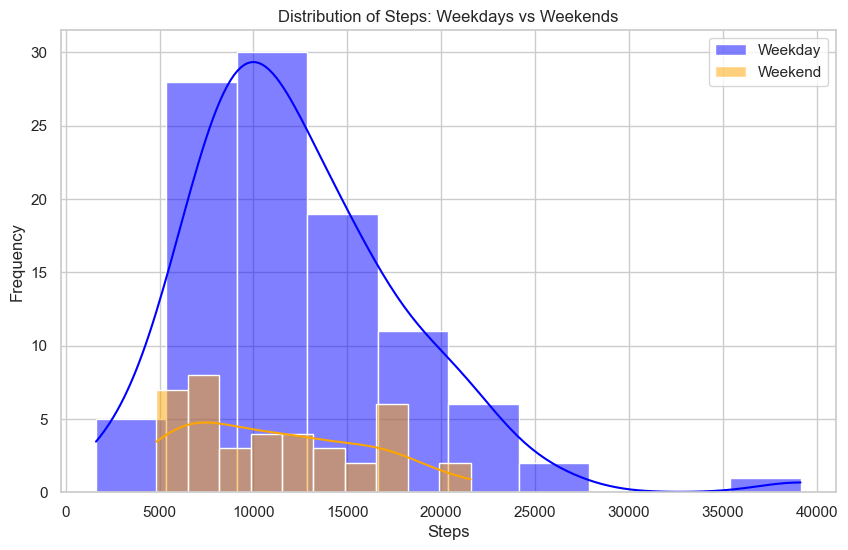

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of steps
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[df_clean['week_type'] == 'Weekday']['steps'], kde=True, label='Weekday', color='blue', bins=10)
sns.histplot(df_clean[df_clean['week_type'] == 'Weekend']['steps'], kde=True, label='Weekend', color='orange', bins=10)
plt.legend()
plt.title('Distribution of Steps: Weekdays vs Weekends')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

In [57]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Use the upper triangle of the correlation matrix to avoid duplicate pairs
# Set k=1 to exclude the diagonal (self-correlation)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find correlations that meet the threshold, excluding the diagonal
filtered_correlations = upper_triangle[((upper_triangle >= 0.50) & (upper_triangle < 0.90)) | 
                                       ((upper_triangle <= -0.50) & (upper_triangle > -0.90))]

# Stack the filtered matrix and reset index to turn it into a DataFrame
strong_correlations = filtered_correlations.stack().reset_index()
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Set the options to display all rows
pd.set_option('display.max_rows', None)

# Display strong correlations
print(strong_correlations)

                         Variable 1                       Variable 2  \
0                   active_calories      medium_activity_met_minutes   
1                   active_calories             medium_activity_time   
2                   active_calories                   sedentary_time   
3                   active_calories         contributors_stay_active   
4               average_met_minutes         low_activity_met_minutes   
5               average_met_minutes      medium_activity_met_minutes   
6               average_met_minutes             medium_activity_time   
7       equivalent_walking_distance             medium_activity_time   
8       equivalent_walking_distance                   sedentary_time   
9       equivalent_walking_distance         contributors_stay_active   
10         low_activity_met_minutes                   sedentary_time   
11         low_activity_met_minutes                   total_calories   
12         low_activity_met_minutes         contributors_stay_ac

In [59]:
pd.reset_option('display.max_rows')

In [62]:
oura_sleep = pd.read_csv("oura_sleep_2024.csv")

In [64]:
oura_sleep.columns

Index(['average_breath', 'average_heart_rate', 'average_hrv', 'awake_time',
       'bedtime_end', 'bedtime_start', 'day', 'deep_sleep_duration',
       'efficiency', 'latency', 'light_sleep_duration', 'lowest_heart_rate',
       'movement_30_sec', 'period', 'rem_sleep_duration', 'restless_periods',
       'score', 'segment_state', 'sleep_midpoint', 'time_in_bed',
       'total_sleep_duration', 'type', 'sleep_phase_5_min', 'timezone',
       'bedtime_start_delta', 'bedtime_end_delta', 'midpoint_at_delta',
       'heart_rate_5_min', 'hrv_5_min', 'contributors_total_sleep',
       'contributors_deep_sleep', 'contributors_rem_sleep',
       'contributors_efficiency', 'contributors_latency',
       'contributors_restfulness', 'contributors_timing',
       'readiness_contributors_activity_balance',
       'readiness_contributors_body_temperature',
       'readiness_contributors_hrv_balance',
       'readiness_contributors_previous_day_activity',
       'readiness_contributors_previous_night'

In [66]:
# Selecting specific columns
columns = ['day', 'deep_sleep_duration', 'light_sleep_duration', 'rem_sleep_duration', 'time_in_bed', 'total_sleep_duration']
selected_data = oura_sleep[columns]

# Aggregating data by day using sum
aggregated_sleep = selected_data.groupby('day').sum().reset_index()

# Convert each relevant column from seconds to hours
time_columns = ['deep_sleep_duration', 'light_sleep_duration', 'rem_sleep_duration', 'time_in_bed', 'total_sleep_duration']
for column in time_columns:
    aggregated_sleep[column] = aggregated_sleep[column] / 3600

print(aggregated_sleep)

            day  deep_sleep_duration  light_sleep_duration  \
0    2024-01-02             1.191667              3.341667   
1    2024-01-03             1.116667              4.900000   
2    2024-01-04             1.233333              4.958333   
3    2024-01-05             1.691667              5.200000   
4    2024-01-06             1.325000              3.266667   
..          ...                  ...                   ...   
148  2024-05-29             1.791667              5.008333   
149  2024-05-30             1.775000              3.883333   
150  2024-05-31             1.575000              4.258333   
151  2024-06-01             1.758333              4.800000   
152  2024-06-02             1.466667              5.141667   

     rem_sleep_duration  time_in_bed  total_sleep_duration  
0              1.416667     6.392500              5.950000  
1              1.858333     9.384167              7.875000  
2              2.058333     8.942500              8.250000  
3          

In [75]:
# Export the DataFrame to a CSV file
# aggregated_sleep.to_csv('aggregated_sleep_data.csv', index=False)

In [94]:
df_clean.to_csv('ourafinal.csv', index=False)